<a target="_blank" href="https://colab.research.google.com/github/Takosaga/fall_24/blob/main/big_data/coursework_assignment/0_exploration.ipynb">


# Exploration

Notebook is the initial exploration of data of a tiktok data from kaggle and api data from youtube

### Structured Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
structured_data = pd.read_csv('tiktok_dataset.csv')

In [3]:
structured_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
len(structured_data.columns)

12

In [5]:
# Dropping missing values in structured data
structured_data.dropna(inplace=True)

Do not want to deal with natural language processing so adjusting text to text length

In [6]:
structured_data['transcription_length'] = structured_data['video_transcription_text'].str.len()

In [7]:
structured_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [8]:
#droping #, video_id, and transciption_text
structured_data.drop(['#', 'video_id', 'video_transcription_text'], axis=1, inplace=True)

In [9]:
structured_data.head()

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [10]:
structured_data.describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,89.093534
std,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,20.682086
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,31.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,75.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,87.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,101.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,182.000000


In [11]:
# focusing on numerical categories
corr_matrix = structured_data[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'transcription_length']].corr()

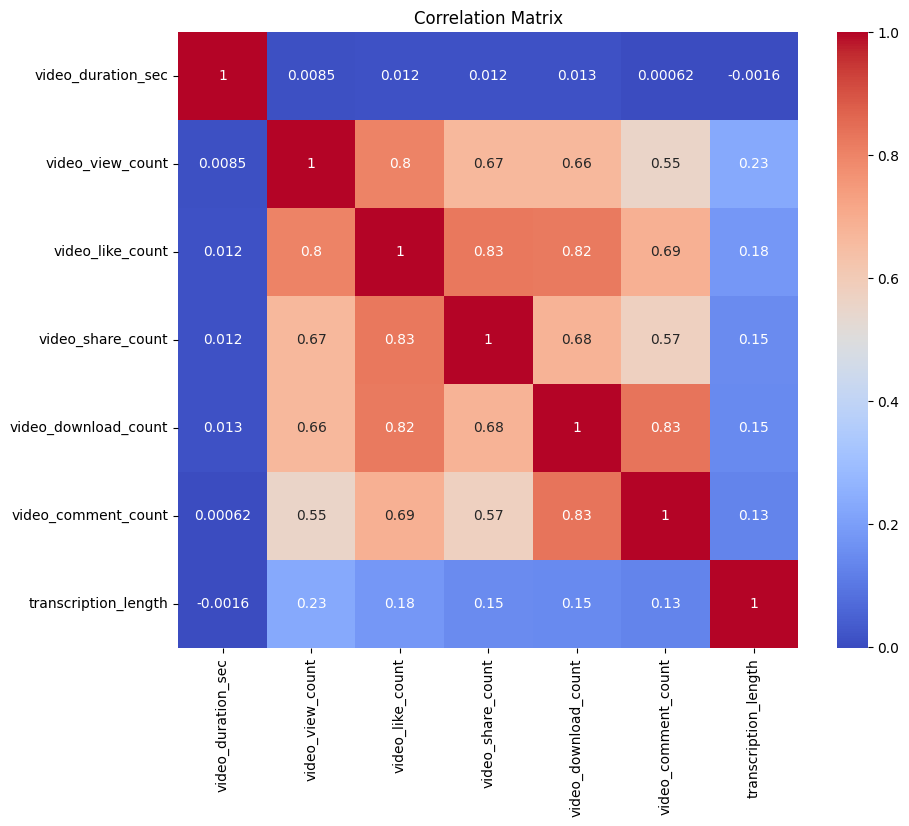

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The inner square of views, likes, shares, downloads, and comments have positve correlation.

Will explore categorical features measure agaisnt view count 

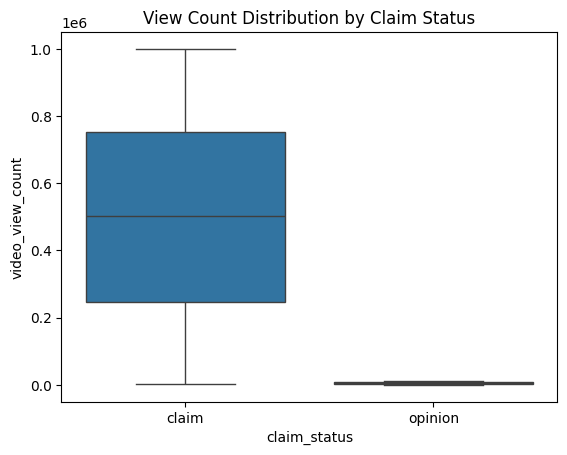

In [18]:
sns.boxplot(data=structured_data, x='claim_status', y='video_view_count')
plt.title('View Count Distribution by Claim Status')
plt.show()


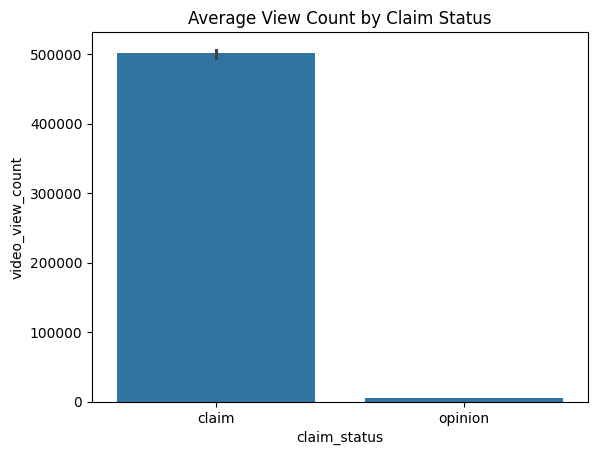

In [19]:
sns.barplot(data=structured_data, x='claim_status', y='video_view_count', estimator=np.mean)
plt.title('Average View Count by Claim Status')
plt.show()

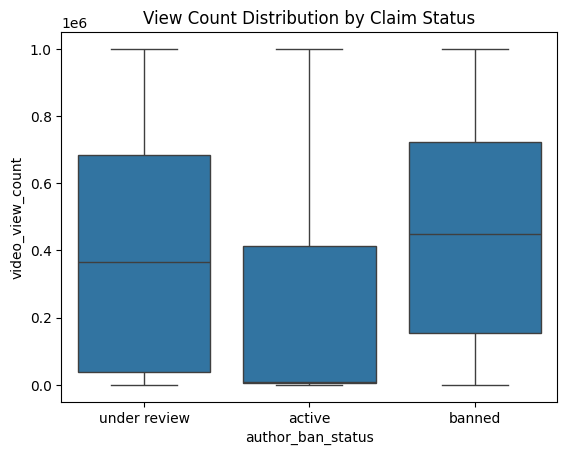

In [22]:
sns.boxplot(data=structured_data, x='author_ban_status', y='video_view_count')
plt.title('View Count Distribution by Claim Status')
plt.show()

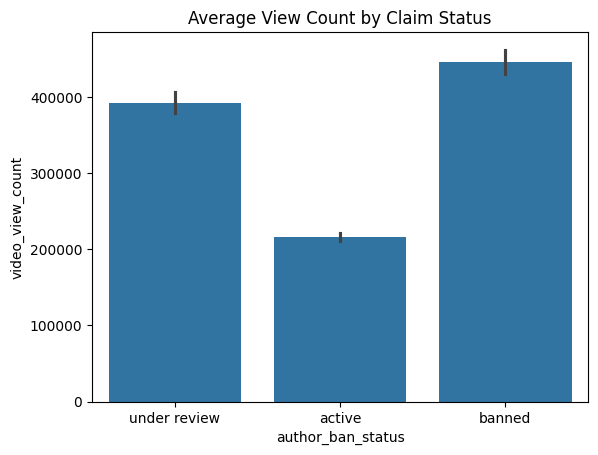

In [24]:
sns.barplot(data=structured_data, x='author_ban_status', y='video_view_count', estimator=np.mean)
plt.title('Average View Count by Claim Status')
plt.show()

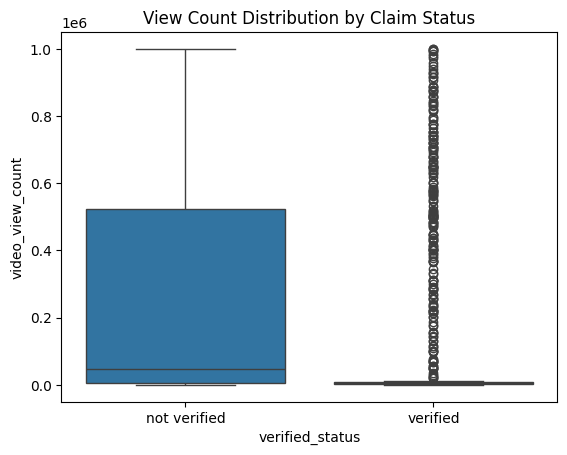

In [26]:
sns.boxplot(data=structured_data, x='verified_status', y='video_view_count')
plt.title('View Count Distribution by Claim Status')
plt.show()


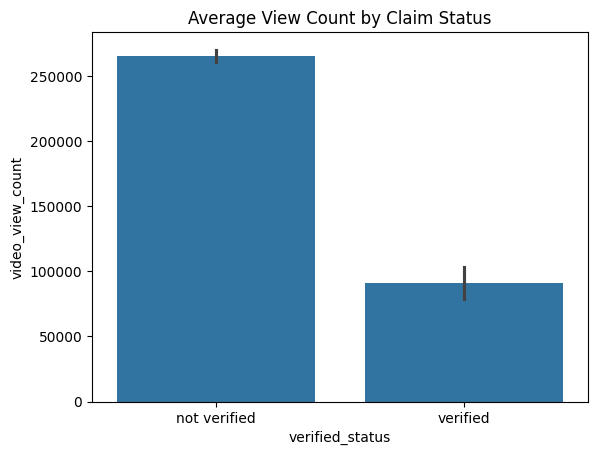

In [28]:

sns.barplot(data=structured_data, x='verified_status', y='video_view_count', estimator=np.mean)
plt.title('Average View Count by Claim Status')
plt.show()

### Unstructured Data
Data from youtube api from top 1000 videos

Using docs and chatgpt to construct json

[Docs for youtube api](https://developers.google.com/youtube/v3/docs/videos)

Next 3 cells will not work without youtube api key

In [39]:
from googleapiclient.discovery import build
from dotenv import load_dotenv
import json
import os

# Load environment variables from the .env file
load_dotenv()

# Get the YouTube API key from the environment
YOUTUBE_API_KEY = os.getenv("YOUTUBE_API_KEY")

# Initialize the YouTube API client
youtube = build("youtube", "v3", developerKey=YOUTUBE_API_KEY)

In [55]:

# Function to fetch video data
def fetch_top_videos(api, max_results=1000):
    videos = []
    next_page_token = None

    while len(videos) < max_results:
        # Call the YouTube API to get popular videos
        response = api.videos().list(
            part="snippet,statistics, topicDetails",
            chart="mostPopular",
            maxResults=min(50, max_results - len(videos)),  # Limit to 50 per API call
            regionCode="US",  # Replace with desired region
            pageToken=next_page_token
        ).execute()

        # Collect video data
        for video in response['items']:
            video_data = {
                "id": video["id"],
                "title": video["snippet"]["title"],
                "description": video["snippet"]["description"],
                "channelTitle": video["snippet"]["channelTitle"],
                "publishedAt": video["snippet"]["publishedAt"],
                "viewCount": video["statistics"].get("viewCount"),
                "likeCount": video["statistics"].get("likeCount"),
                "commentCount": video["statistics"].get("commentCount")
            }

            # Include topic details if available
            if "topicDetails" in video:
                video_data["topicCategories"] = video["topicDetails"].get("topicCategories", [])
            
            videos.append(video_data)


        # Update the next page token
        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return videos

Only will use view count, like count and comment count since not categorical and other numerical data availiable from api though will have categorical topics if available

In [56]:
# Fetch the top videos
top_videos = fetch_top_videos(youtube, max_results=1000)

# Save to JSON file
output_file = "top_videos.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(top_videos, f, indent=4)

print(f"Top 1000 videos saved to {output_file}")

Top 1000 videos saved to top_videos.json


In [57]:
unstructured_data = pd.read_json('top_videos.json')

In [58]:
unstructured_data.head()

,id,title,description,channelTitle,publishedAt,viewCount,likeCount,commentCount,topicCategories
0,-dJAhKekt_I,Citadelle des Morts Gameplay Trailer | Call of...,Citadelle des Morts awaits 🏰\n\nThis abandoned...,Call of Duty,2024-12-03T15:30:00Z,480338,27008.0,1819.0,[https://en.wikipedia.org/wiki/Action-adventur...
1,RtI8qPqCIeI,He Nearly Fell Off The Cliff 😬,Professional Red Bull mountain biker Thomas Ge...,Red Bull,2024-12-02T09:03:32Z,10205203,648096.0,2474.0,[https://en.wikipedia.org/wiki/Lifestyle_(soci...
2,iV46TJKL8cU,Disney’s Snow White | Official Trailer | In Th...,"Magic mirror on the wall, show us the story th...",Disney,2024-12-03T15:01:02Z,3538017,16403.0,12703.0,"[https://en.wikipedia.org/wiki/Entertainment, ..."
3,W2gXl0mNn6c,your bad customers,"Use code ""icecreamsandwich"" at the link below ...",Ice Cream Sandwich,2024-12-03T21:00:33Z,659992,77634.0,3115.0,NaN
4,mWkajLU7fxQ,Cloak & Dagger: Inseparable Bond | Character R...,Cloak and Dagger are an inseparable duo who ea...,Marvel Rivals,2024-12-04T02:00:34Z,359899,20798.0,1683.0,[https://en.wikipedia.org/wiki/Action-adventur...


In [60]:

# Extract category names
def extract_category_names(category_links):
    if isinstance(category_links, list):  # Ensure it's a list
        return [link.split('/')[-1].replace('_', ' ') for link in category_links]
    return []

# Apply the extraction to the 'topicCategories' column
unstructured_data['categories'] = unstructured_data['topicCategories'].apply(extract_category_names)


In [62]:
unstructured_data.head()

,id,title,description,channelTitle,publishedAt,viewCount,likeCount,commentCount,topicCategories,categories
0,-dJAhKekt_I,Citadelle des Morts Gameplay Trailer | Call of...,Citadelle des Morts awaits 🏰\n\nThis abandoned...,Call of Duty,2024-12-03T15:30:00Z,480338,27008.0,1819.0,[https://en.wikipedia.org/wiki/Action-adventur...,"[Action-adventure game, Action game, Role-play..."
1,RtI8qPqCIeI,He Nearly Fell Off The Cliff 😬,Professional Red Bull mountain biker Thomas Ge...,Red Bull,2024-12-02T09:03:32Z,10205203,648096.0,2474.0,[https://en.wikipedia.org/wiki/Lifestyle_(soci...,[Lifestyle (sociology)]
2,iV46TJKL8cU,Disney’s Snow White | Official Trailer | In Th...,"Magic mirror on the wall, show us the story th...",Disney,2024-12-03T15:01:02Z,3538017,16403.0,12703.0,"[https://en.wikipedia.org/wiki/Entertainment, ...","[Entertainment, Film, Performing arts]"
3,W2gXl0mNn6c,your bad customers,"Use code ""icecreamsandwich"" at the link below ...",Ice Cream Sandwich,2024-12-03T21:00:33Z,659992,77634.0,3115.0,NaN,[]
4,mWkajLU7fxQ,Cloak & Dagger: Inseparable Bond | Character R...,Cloak and Dagger are an inseparable duo who ea...,Marvel Rivals,2024-12-04T02:00:34Z,359899,20798.0,1683.0,[https://en.wikipedia.org/wiki/Action-adventur...,"[Action-adventure game, Action game, Role-play..."


In [48]:
unstructured_data.describe()

,viewCount,likeCount,commentCount
count,2.000000e+02,1.990000e+02,199.000000
mean,2.634634e+06,1.141348e+05,5909.783920
std,8.272000e+06,4.390429e+05,14280.850894
min,4.258300e+04,9.050000e+02,141.000000
25%,3.674172e+05,1.255100e+04,815.500000
50%,6.487630e+05,2.281600e+04,1881.000000
75%,1.728366e+06,6.512050e+04,3938.500000
max,9.973143e+07,5.451984e+06,126901.000000


In [ ]:
corr_matrix2 = unstructured_data[['viewCount','likeCount','commentCount']].corr()

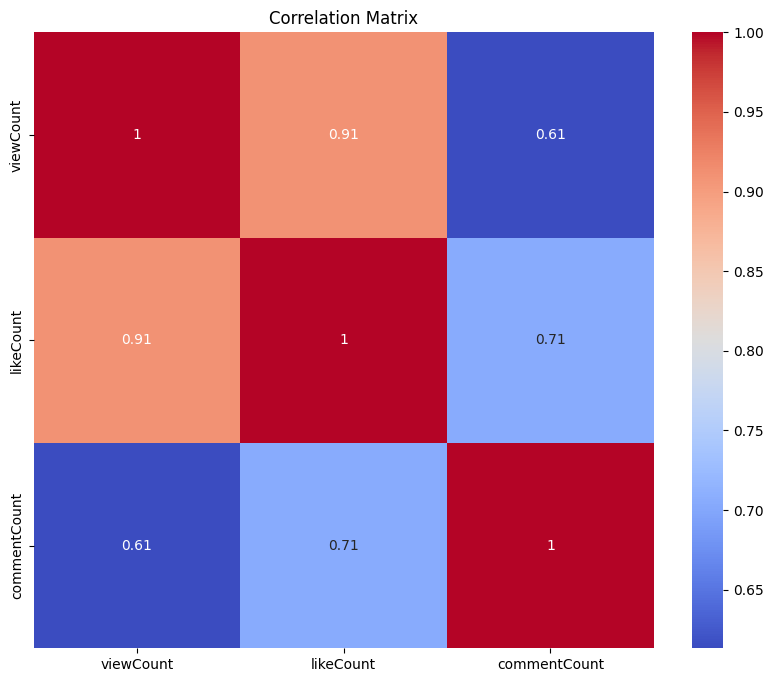

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

                 categories     viewCount
26            Music of Asia  1.415673e+07
10                  Cricket  1.192369e+07
14                     Film  6.573762e+06
3      Association football  6.095814e+06
6                    Boxing  5.648454e+06
8           Christian music  5.408201e+06
38                    Sport  5.018574e+06
42                  Tourism  4.589213e+06
25                    Music  4.276551e+06
17            Hip hop music  2.923321e+06
12            Entertainment  2.778200e+06
30                Pop music  2.436296e+06
41       Television program  2.145798e+06
13                  Fashion  2.102780e+06
24               Motorsport  2.025305e+06
22    Lifestyle (sociology)  1.908703e+06
19                   Humour  1.680817e+06
27   Music of Latin America  1.643026e+06
20                     Jazz  1.501847e+06
23       Mixed martial arts  1.398301e+06
18                    Hobby  1.392164e+06
11         Electronic music  1.386811e+06
28          Performing arts  1.320

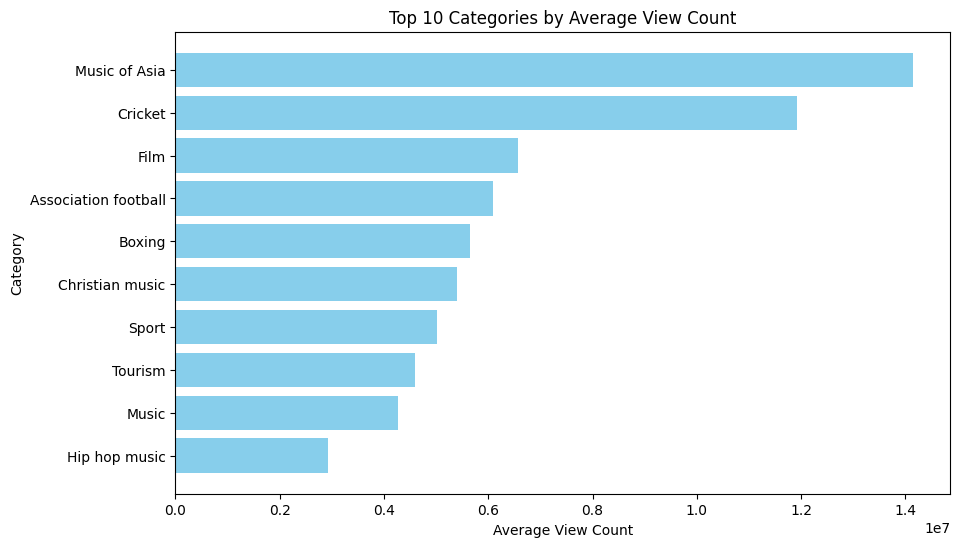

In [66]:

# Step 1: Explode the 'categories' column
df_exploded = unstructured_data.explode('categories')

# Step 2: Group by categories and aggregate view counts
category_view_counts = df_exploded.groupby('categories')['viewCount'].mean().reset_index()

# Step 3: Sort for better visualization
category_view_counts = category_view_counts.sort_values(by='viewCount', ascending=False)

# Display the top categories
print(category_view_counts)

# Optional: Plot the top 10 categories by view count
import matplotlib.pyplot as plt

top_categories = category_view_counts.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_categories['categories'], top_categories['viewCount'], color='skyblue')
plt.xlabel('Average View Count')
plt.ylabel('Category')
plt.title('Top 10 Categories by Average View Count')
plt.gca().invert_yaxis()  # Reverse the y-axis for better readability
plt.show()